In [45]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [47]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(np.uint8(0), np.uint8(255), np.uint8(0), np.uint8(255))

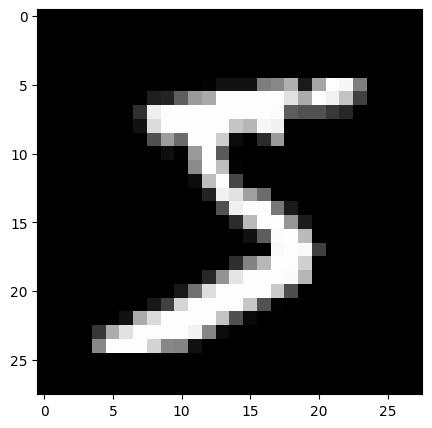

In [48]:
# Visualize a sample image
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.imshow(X_train[0], cmap='gray')

In [49]:
# Flatten and Normalize the images
X_train = X_train.reshape(-1, 784) / 255
X_test = X_test.reshape(-1, 784) / 255

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [51]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

In [52]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
y_train[0]

np.uint8(5)

In [54]:
# Convert labels to categorical one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [56]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Build the model.
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model.
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

## Model Summary

> First Hidden Layer
* No. of inputs:  784
* No. of neurons in hidden layer 1:  64
* Total No. of Parameters:  784*64 (Input-hidden1 weights) + 64 (hidden1 biases)= 50240

> Second Hidden Layer
* No. of inputs:  64
* No. of neurons in hidden layer 2:  64
* Total No. of Parameters:  64*64 (hidden1-hidden2 weights) + 64 (hidden2 biases)= 4160

> Output Layer
* No. of inputs:  64
* No. of neurons in output layer:  10
* Total No. of Parameters:  64*10 (hidden2-output weights) + 10 (output biases)= 650

> Total No. of Parameters:  50240+4160+650= 55050

In [58]:
# Train the model.
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=10, batch_size=32)
print("Training complete.\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8413 - loss: 0.5400 - val_accuracy: 0.9482 - val_loss: 0.1719
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9577 - loss: 0.1423 - val_accuracy: 0.9597 - val_loss: 0.1378
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9710 - loss: 0.0960 - val_accuracy: 0.9651 - val_loss: 0.1159
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9783 - loss: 0.0723 - val_accuracy: 0.9668 - val_loss: 0.1136
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9819 - loss: 0.0590 - val_accuracy: 0.9664 - val_loss: 0.1168
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9849 - loss: 0.0466 - val_accuracy: 0.9704 - val_loss: 0.1032
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9868 - loss: 0.0422 - val_accuracy: 0.9731 - val_loss: 0.0984
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0373 

In [59]:
batch_size = 32
training_samples = 0.8 * 60000
iterations_per_epoch = training_samples/batch_size
iterations_per_epoch


1500.0

In [60]:
# Evaluate the model.
print("Evaluating the model on test data...")
model.evaluate(X_test, y_test)

Evaluating the model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1312


[0.109318308532238, 0.972000002861023]

In [61]:
print(history.params)

{'verbose': 'auto', 'epochs': 10, 'steps': 1500}


In [62]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [63]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.910417,0.308305,0.948250,0.171949
1,0.959542,0.136033,0.959667,0.137798
2,0.969854,0.097759,0.965083,0.115944
3,0.976375,0.076635,0.966833,0.113573
4,0.979688,0.064084,0.966417,0.116844
5,0.982896,0.052117,0.970417,0.103154
6,0.986333,0.044430,0.973083,0.098387
7,0.986687,0.041219,0.974333,0.099736
8,0.989812,0.031716,0.969667,0.117946
9,0.989854,0.030279,0.969833,0.119339


<Axes: >

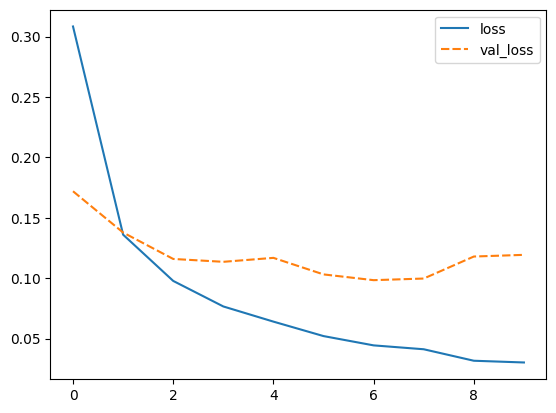

In [64]:
# Plot the loss
import seaborn as sns
sns.set_style()
sns.lineplot(data=history_df[['loss', 'val_loss']])

<Axes: >

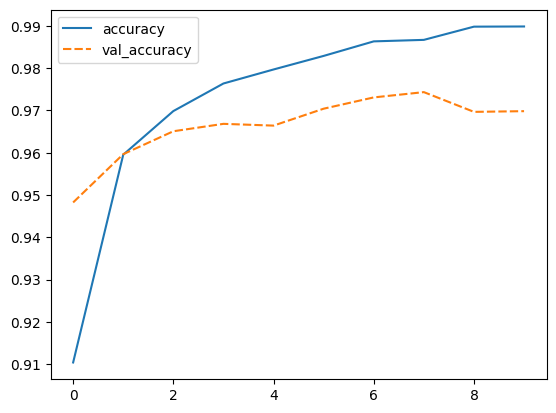

In [65]:
# Plot the accuracy
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

In [66]:
import cv2
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [67]:
type(input_image)

numpy.ndarray

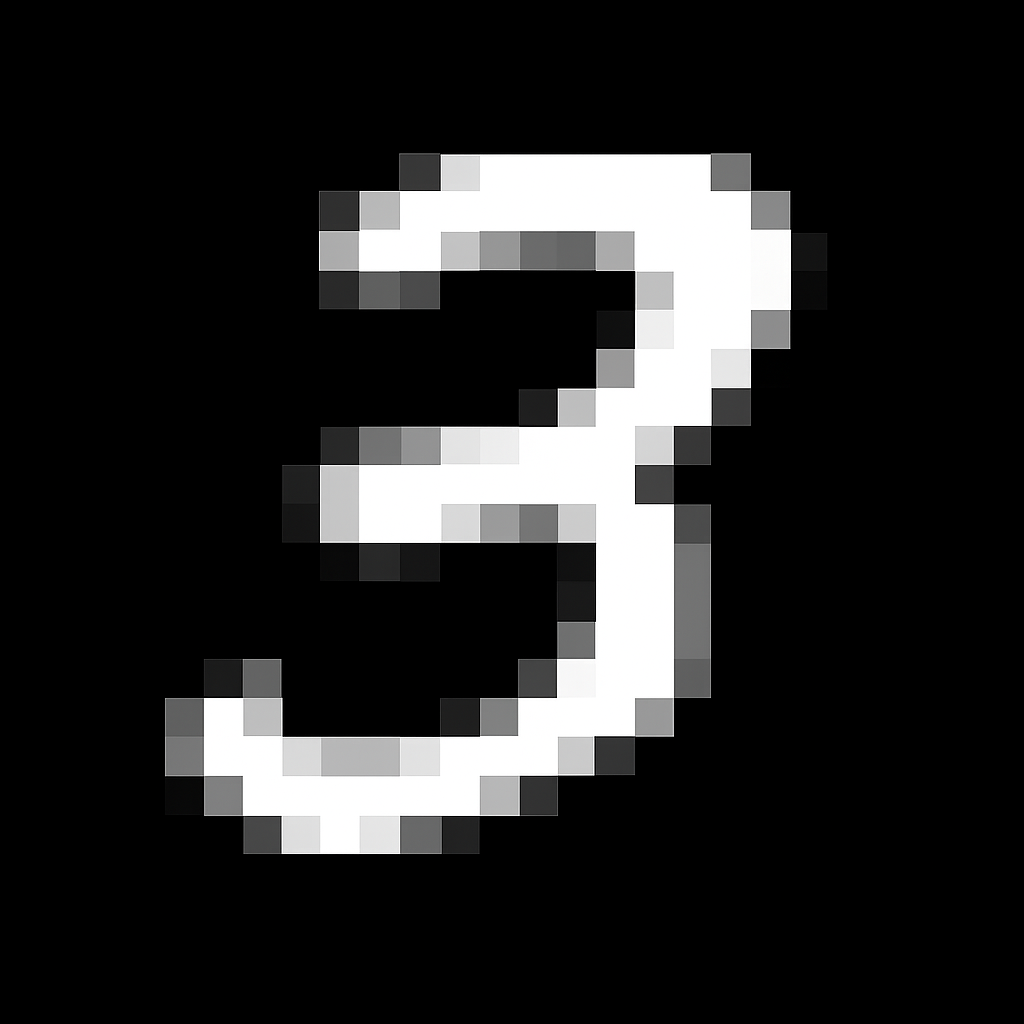

In [68]:
from google.colab.patches import cv2_imshow
cv2_imshow(input_image)


In [69]:
input_image.shape

(1024, 1024, 3)

In [70]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)



In [71]:
grayscale.shape

(1024, 1024)

In [72]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [73]:
input_image_resize.shape

(28, 28)

In [74]:
cv2_imshow(input_image_resize)

In [75]:
input_image_resize = input_image_resize/255

In [76]:
type(input_image_resize)

numpy.ndarray

In [77]:
image_reshaped = input_image_resize.reshape(1, 784)


In [78]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[2.2474771e-13 5.6498611e-11 1.3911847e-06 9.9999857e-01 8.2298839e-14
  2.6840039e-10 7.3168115e-17 1.4471302e-10 2.9857453e-08 1.1684604e-09]]


In [79]:
import numpy as np
input_pred_label = np.argmax(input_prediction)

In [80]:
print(input_pred_label)

3


## Save Model

In [82]:
import pickle

with open('Handwritten Digit Recognition_Model.pkl', 'wb') as file:
    pickle.dump(model, file)